# Bag Of n-grams

What is Bag of n-grams?

Bag of n-grams is an extension of the Bag of Words (BoW) model that includes n-grams—sequences of n words—rather than just individual words.

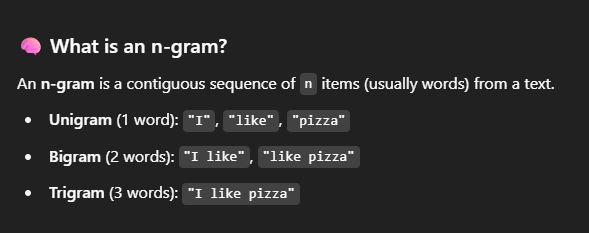

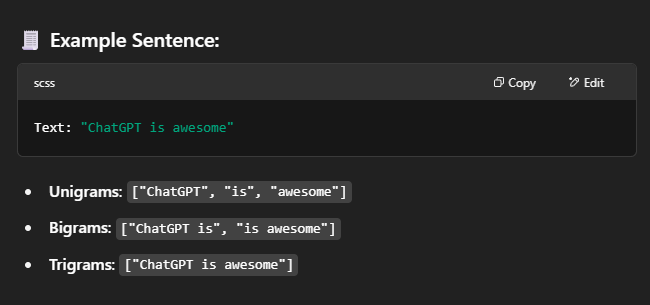

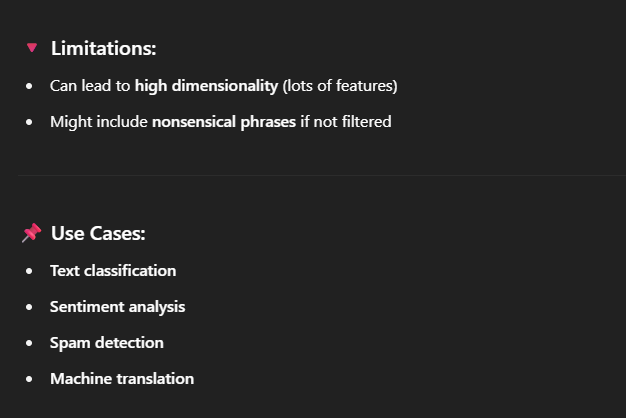

### Let's first understand how to generate n-grams using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

text = ["Thor Hathodawala is looking for a job"]

v.fit(text)

print(v.vocabulary_)


{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}


In [ ]:
v = CountVectorizer(ngram_range=(1,2))

v.fit(text)

print(v.vocabulary_)

{'thor': 9, 'hathodawala': 2, 'is': 4, 'looking': 7, 'for': 0, 'job': 6, 'thor hathodawala': 10, 'hathodawala is': 3, 'is looking': 5, 'looking for': 8, 'for job': 1}


In [ ]:
v = CountVectorizer(ngram_range=(1,3))

v.fit(text)

print(v.vocabulary_)

{'thor': 12, 'hathodawala': 2, 'is': 5, 'looking': 9, 'for': 0, 'job': 8, 'thor hathodawala': 13, 'hathodawala is': 3, 'is looking': 6, 'looking for': 10, 'for job': 1, 'thor hathodawala is': 14, 'hathodawala is looking': 4, 'is looking for': 7, 'looking for job': 11}


### Take a Corpus, preprocess them to remove stop words, lemmatize etc and then generate bag of 1 grams and 2 grams from it.

In [ ]:

import spacy

corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]


# Create a def function to remove stop word & Lemmatize.

nlp = spacy.load("en_core_web_sm")


def preprocess(text):

  doc = nlp(text)
  filtered_token = []

  for token in doc:

    if token.is_stop or token.is_punct:
      continue
    filtered_token.append(token.lemma_)

  return " ".join(filtered_token)



# Preprocess the Corpus

Preprocess_Corpus = [preprocess(text) for text in corpus]
print("\nPreprocessed Corpus :", Preprocess_Corpus)


# Generate bag of n gram vector

v = CountVectorizer(ngram_range=(1,2))
v.fit(Preprocess_Corpus)
print("\nBag of Words :", v.vocabulary_)

Vector = v.transform(Preprocess_Corpus).toarray()
print("\nVectors :", Vector)


# Let's take a document that has out of vocabulary (OOV)

OOV = v.transform(["Hulk eat pizza"]).toarray()
print("\nVector of OOV :", OOV)



Preprocessed Corpus : ['thor eat pizza', 'Loki tall', 'Loki eat pizza']

Bag of Words : {'thor': 7, 'eat': 0, 'pizza': 5, 'thor eat': 8, 'eat pizza': 1, 'loki': 2, 'tall': 6, 'loki tall': 4, 'loki eat': 3}

Vectors : [[1 1 0 0 0 1 0 1 1]
 [0 0 1 0 1 0 1 0 0]
 [1 1 1 1 0 1 0 0 0]]

Vector of OOV : [[1 1 0 0 0 1 0 0 0]]


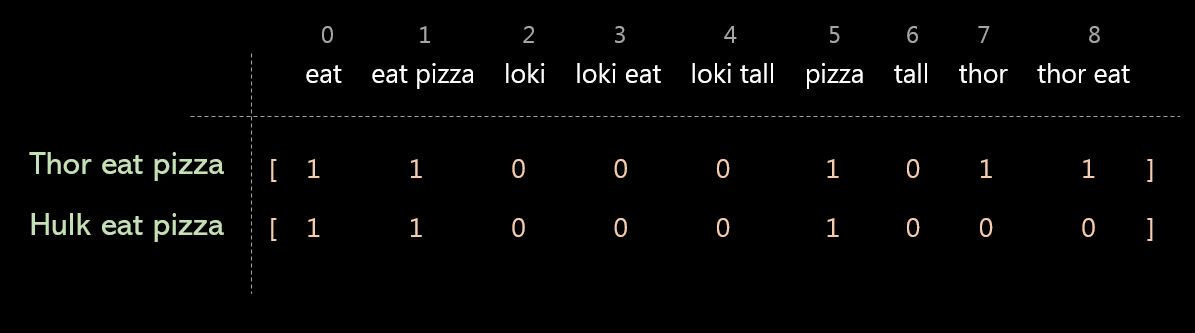

### News Category Classification Problem

Okay now that we know basics of BAG of n grams vectorizer 😎 It is the time to work on a real problem. Here we want to do a news category classification. We will use bag of n-grams and traing a machine learning model that can categorize any news into one of the following categories,

1. BUSINESS
2. SPORTS
3. CRIME
4. SCIENCE

### Dataset

Dataset Credits: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65

1. This data consists of two columns. - Text - Category
2. Text is a news article
3. Category can be one of these 4: 'BUSINESS', 'SPORTS', 'CRIME', 'SCIENCE', to keep things simple I trimmed additional categories from the original dataset

                                                    text  category
0      Watching Schrödinger's Cat Die University of C...   SCIENCE
1         WATCH: Freaky Vortex Opens Up In Flooded Lake    SCIENCE
2      Entrepreneurs Today Don't Need a Big Budget to...  BUSINESS
3      These Roads Could Recharge Your Electric Car A...  BUSINESS
4      Civilian 'Guard' Fires Gun While 'Protecting' ...     CRIME
...                                                  ...       ...
12690  Coach Shakes Hands Of Imaginary Players After ...    SPORTS
12691  This Minivan-Sized Sea Sponge Is Thought To Be...   SCIENCE
12692  RECAP: Dramatic Eclipse Photos Don't miss the ...   SCIENCE
12693  Richard Sherman Wants To Talk About Police Sho...    SPORTS
12694  Your Customers Ignore Your Emails -- How Will ...  BUSINESS

[12695 rows x 2 columns]

Shape : (12695, 2)

 category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

 category
BUSINESS    1381
SPORTS      1381


Text(95.72222222222221, 0.5, 'Truth')

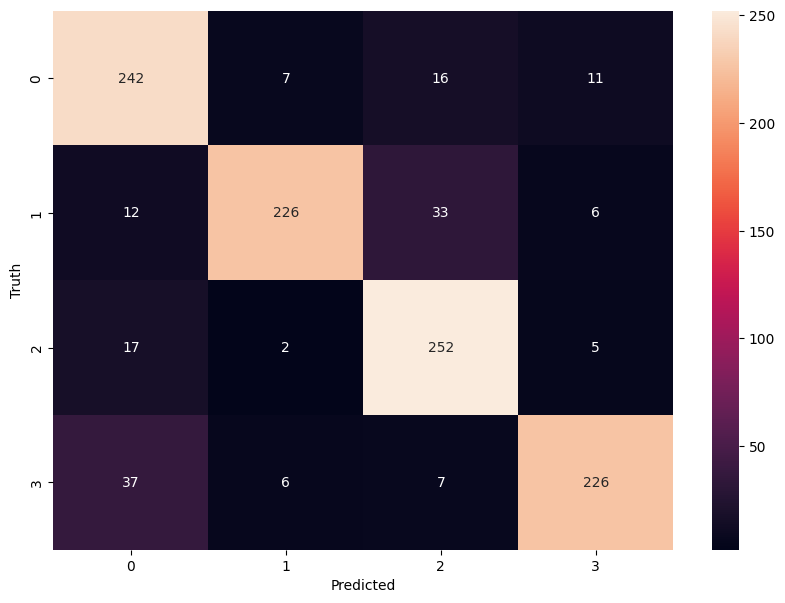

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn


# Define the Dataset

df = pd.read_json("news_dataset.json")
print(df)
print("\nShape :", df.shape)


# Cout of each Category

Cout = df.category.value_counts()
print("\n", Cout)


# Handle imbalance data

min_sample = 1381

df_BUSINESS = df[df.category == "BUSINESS"].sample(min_sample, random_state=2022)
df_SPORTS = df[df.category == "SPORTS"].sample(min_sample, random_state=2022)
df_CRIME = df[df.category == "CRIME"].sample(min_sample, random_state=2022)
df_SCIENCE = df[df.category == "SCIENCE"].sample(min_sample, random_state=2022)


# Create a Dataframe using the above balanced data

df_balanced = pd.concat([df_BUSINESS, df_SPORTS, df_CRIME, df_SCIENCE], axis=0)

Couts = df_balanced.category.value_counts()
print("\n", Couts)


# Convert text category to a number

Target = {"BUSINESS" : 0, "SPORTS" : 1, "CRIME" : 2, "SCIENCE" : 3}
df_balanced["New_category"] = df_balanced["category"].map(Target)
print("\n", df_balanced.head())


# Preprocess the Text using def function created above

df_balanced["Clean_text"] = df_balanced["text"].apply(preprocess)
print("\n", df_balanced.head())


# Split the dataset to Train & Test

X_train, X_test, y_train, y_test = train_test_split(df_balanced["Clean_text"], df_balanced["New_category"], test_size=0.2, random_state=2022, stratify=df_balanced["New_category"])


# Create a pipeline

clf = Pipeline([

                ("Vectorizer_bow", CountVectorizer(ngram_range=(1,2))),
                ("Multi NB", MultinomialNB())

                ])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('\n',classification_report(y_test, y_pred))



# Plot confusion matrix

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix", cm)
print('\n')

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')


# Exercise

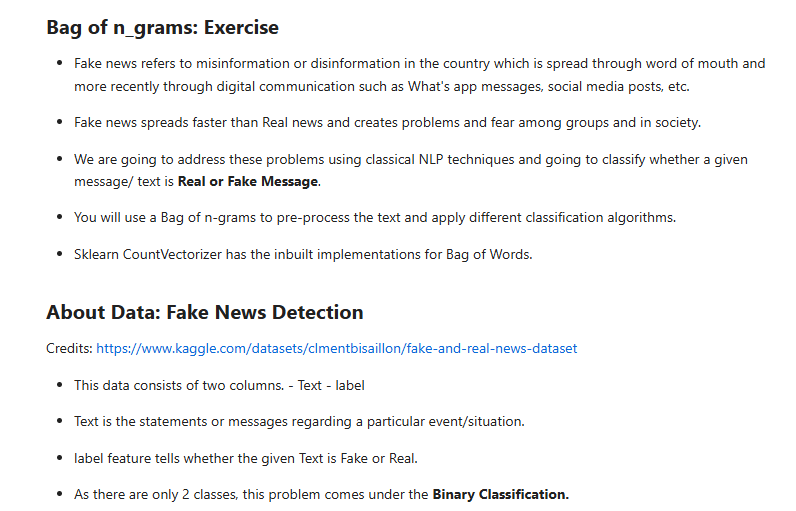

                                                Text label
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake
1  U.S. conservative leader optimistic of common ...  Real
2  Trump proposes U.S. tax overhaul, stirs concer...  Real
3   Court Forces Ohio To Allow Millions Of Illega...  Fake
4  Democrats say Trump agrees to work on immigrat...  Real

Shape : (9900, 2)

Count : label
Fake    5000
Real    4900
Name: count, dtype: int64

                                                 Text label  New_label
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake          0
1  U.S. conservative leader optimistic of common ...  Real          1
2  Trump proposes U.S. tax overhaul, stirs concer...  Real          1
3   Court Forces Ohio To Allow Millions Of Illega...  Fake          0
4  Democrats say Trump agrees to work on immigrat...  Real          1

                                                 Text label  New_label  \
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake     

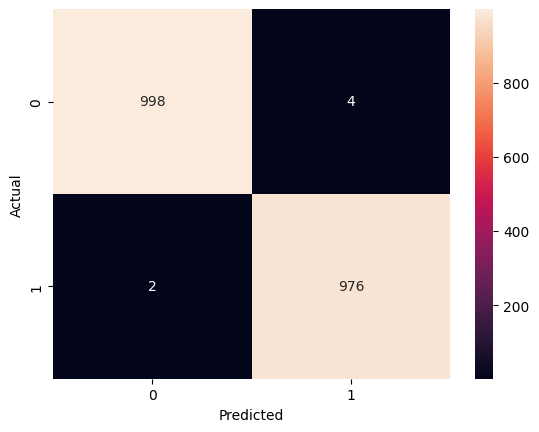

In [10]:

import pandas as pd
import spacy
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Define the Dataset

df = pd.read_csv("Fake_Real_Data.csv")
print(df.head())
print("\nShape :", df.shape)


# Count of each category

Count = df.label.value_counts()
print("\nCount :", Count)


# Convert text category to a number

Target = {"Fake": 0, "Real": 1}
df["New_label"] = df["label"].map(Target)
print("\n", df.head())


# Create a def function for Preprocessing

nlp = spacy.load("en_core_web_sm")

def preprocessing(text):

  doc = nlp(text)
  filtered_text = []

  for token in doc:

    if token.is_stop or token.is_punct:
      continue
    filtered_text.append(token.lemma_)
  return " ".join(filtered_text)


# create a new column and use the function to get the clean data

df["Clean_text"] = df["Text"].apply(preprocessing)
print("\n", df.head())


# Split the Dataset to Test & Train

X_train, X_test, y_train, y_test = train_test_split(df["Clean_text"], df["New_label"], test_size=0.2, random_state=2022, stratify=df["New_label"])


# Create a Pipeline

clf = Pipeline([

                ("Vectorizer_bow", CountVectorizer(ngram_range=(1,3))),
                ("RandomForest", RandomForestClassifier())
])


# Train the model

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


# Classfication Report

Report = classification_report(y_pred, y_test)
print("\nClassfication Report :", Report)


# Confusion matrix

Matrix = confusion_matrix(y_pred, y_test)
print("\nConfusion matrix :", Matrix)


# Plot the Confusion matrix

sns.heatmap(Matrix, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
